In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import lightgbm as lgb



In [76]:
df=pd.read_csv('heart_disease_uci.csv')

In [77]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [79]:
df.fillna(0,inplace=True)

In [80]:
# Convert categorical variables to numerical
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']:
    df[col] = pd.Categorical(df[col]).codes

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int8   
 3   dataset   920 non-null    object 
 4   cp        920 non-null    int8   
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int8   
 8   restecg   920 non-null    int8   
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int8   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int8   
 13  ca        920 non-null    float64
 14  thal      920 non-null    int8   
 15  num       920 non-null    int8   
dtypes: float64(5), int64(2), int8(8), object(1)
memory usage: 64.8+ KB


In [82]:
# let's summarie the age column
df['num'].describe()

count    920.000000
mean       0.995652
std        1.142693
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

<Axes: xlabel='num', ylabel='Count'>

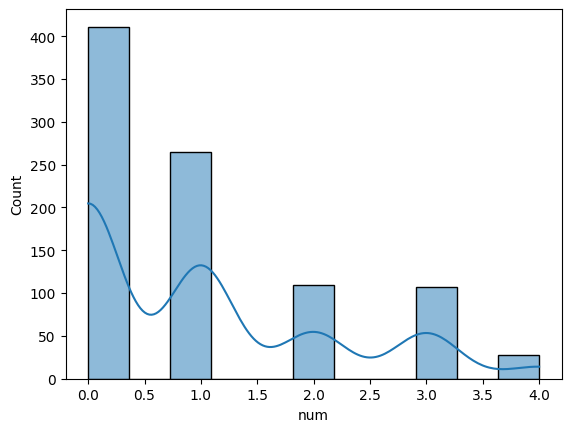

In [83]:
# draw a histogram to see the distribution of age column
sns.histplot(df['num'], kde=True)

In [84]:

# Split features (X) and target variable (y)
X = df.drop(columns=['id', 'dataset', 'num'])  # Remove irrelevant columns
y = df['num']


In [85]:
# Combine classes 2, 3, and 4 into a single class
y.replace({2: 2, 3: 2, 4: 2}, inplace=True)

# Check the class distribution after combining
print("Class distribution after combining classes 2, 3, and 4:", y.value_counts())

Class distribution after combining classes 2, 3, and 4: num
0    411
1    265
2    244
Name: count, dtype: int64


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 13
[LightGBM] [Info] Start training from score -0.784119
[LightGBM] [Info] Start training from score -1.249372
[LightGBM] [Info] Start training from score -1.359483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

LGBMClassifier()

In [88]:
# Make predictions
y_pred = model.predict(X_test)

In [89]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6793478260869565


In [90]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        75
           1       0.56      0.41      0.47        54
           2       0.62      0.67      0.64        55

    accuracy                           0.68       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.67      0.68      0.67       184



In [91]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after SMOTE:", Counter(y_resampled))

# Train the model using the balanced dataset
model = lgb.LGBMClassifier()
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Class distribution after SMOTE: Counter({2: 336, 0: 336, 1: 336})
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 1008, number of used features: 13
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.6684782608695652
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        75
           1       0.54      0.48      0.51        54
           2       0.64      0.65      0.65        55

    accuracy                           0.67       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.67      0.66       184



## Comparing to a Binary Classfication

In [102]:
# Split features (X) and target variable (y)
X = df.drop(columns=['id', 'dataset', 'num'])  # Remove irrelevant columns
y = df['num']

# Combine classes 2, 3, and 4 into a single class
y.replace({1:2,2: 2, 3: 2, 4: 2}, inplace=True)

# Check the class distribution after combining
print("Class distribution after combining classes 2, 3, and 4:", y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)


Class distribution after combining classes 2, 3, and 4: num
2    509
0    411
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 400, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543478 -> initscore=0.174353
[LightGBM] [Info] Start training from score 0.174353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

## Neural Network Implementation

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [96]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,Cleveland,3,145.0,233.0,1,1,150.0,0,2.3,1,0.0,1,0
1,2,67,1,Cleveland,0,160.0,286.0,0,1,108.0,1,1.5,2,3.0,2,2
2,3,67,1,Cleveland,0,120.0,229.0,0,1,129.0,1,2.6,2,2.0,3,1
3,4,37,1,Cleveland,2,130.0,250.0,0,2,187.0,0,3.5,1,0.0,2,0
4,5,41,0,Cleveland,1,130.0,204.0,0,1,172.0,0,1.4,3,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,VA Long Beach,0,127.0,333.0,1,3,154.0,0,0.0,0,0.0,0,1
916,917,62,1,VA Long Beach,3,0.0,139.0,0,3,0.0,0,0.0,0,0.0,0,0
917,918,55,1,VA Long Beach,0,122.0,223.0,1,3,100.0,0,0.0,0,0.0,1,2
918,919,58,1,VA Long Beach,0,0.0,385.0,1,1,0.0,0,0.0,0,0.0,0,0


In [103]:
# Splitting features and target variable
X = df.drop(columns=['num','dataset'])  # Features
y = df['num']  # Target variable

# Normalizing numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for 'num'
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Since the target variable is not one-hot encoded
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/35
19/19 [==============================] - 4s 13ms/step - loss: 0.8789 - accuracy: 0.6276 - val_loss: 0.6709 - val_accuracy: 0.7905
Epoch 2/35
19/19 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7959 - val_loss: 0.4723 - val_accuracy: 0.8514
Epoch 3/35
19/19 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.8010 - val_loss: 0.3833 - val_accuracy: 0.8716
Epoch 4/35
19/19 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8214 - val_loss: 0.3586 - val_accuracy: 0.8784
Epoch 5/35
19/19 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.8197 - val_loss: 0.3445 - val_accuracy: 0.8851
Epoch 6/35
19/19 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8248 - val_loss: 0.3507 - val_accuracy: 0.8784
Epoch 7/35
19/19 [==============================] - 0s 4ms/step - loss: 0.3755 - accuracy: 0.8333 - val_loss: 0.3212 - val_accuracy: 0.8851
Epoch 8/35
19/19 [=

In [104]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predicting on test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

6/6 [==============================] - 0s 1ms/step
Confusion Matrix:
[[64 11]
 [19 90]]


In [105]:
# Generating classification report
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        75
           2       0.89      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

